<a href="https://colab.research.google.com/github/egorji/PCA-Implementation/blob/main/HealthAnalysis_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Import

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import warnings
warnings.filterwarnings('ignore')

In [3]:
# saved the data on google drive and give colab access to it
from google.colab import drive
drive.mount('/drive')

Mounted at /drive


### Shift to Virtual Care

In [4]:
path="/drive/My Drive/Project/MentalHealthVirtualCare.csv"
df1=pd.read_csv(path, skiprows=0)

In [5]:
df1.head()

,Fiscal year,Fiscal quarter,Jurisdiction,Physician specialty,Sex,Age group,Income quintile,Urban or rural/remote neighbourhood,Modality,Number \nof patients,Number \nof services,Total \npayments
0,2019–2020,Q1,Alberta,Family medicine,Female,Total,Total,Total,In person,"165,829","290,618","$25,334,135"
1,2019–2020,Q1,Alberta,Family medicine,Female,Total,Total,Total,Virtual,"8,903","10,724","$352,596"
2,2019–2020,Q1,Alberta,Family medicine,Male,Total,Total,Total,In person,"91,721","165,462","$14,102,891"
3,2019–2020,Q1,Alberta,Family medicine,Male,Total,Total,Total,Virtual,"5,241","6,436","$236,296"
4,2019–2020,Q1,Alberta,Family medicine,Total,00–17,Total,Total,In person,"13,910","25,744","$2,262,734"


In [6]:
df1['Age group'].value_counts()

Total    4181
00–17     902
18–64     830
65+       827
Name: Age group, dtype: int64

In [7]:
df1['Jurisdiction'].value_counts()

Alberta             1616
Ontario             1616
British Columbia    1605
Manitoba            1539
Saskatchewan         364
Name: Jurisdiction, dtype: int64

In [8]:
df1 = df1.rename(columns={df1.columns[7]: "NeighbourhoodType", df1.columns[9]: "#Patients",
                        df1.columns[10]: "#Services",
                        df1.columns[11]: "TotalPayment"})
df1.head()

,Fiscal year,Fiscal quarter,Jurisdiction,Physician specialty,Sex,Age group,Income quintile,NeighbourhoodType,Modality,#Patients,#Services,TotalPayment
0,2019–2020,Q1,Alberta,Family medicine,Female,Total,Total,Total,In person,"165,829","290,618","$25,334,135"
1,2019–2020,Q1,Alberta,Family medicine,Female,Total,Total,Total,Virtual,"8,903","10,724","$352,596"
2,2019–2020,Q1,Alberta,Family medicine,Male,Total,Total,Total,In person,"91,721","165,462","$14,102,891"
3,2019–2020,Q1,Alberta,Family medicine,Male,Total,Total,Total,Virtual,"5,241","6,436","$236,296"
4,2019–2020,Q1,Alberta,Family medicine,Total,00–17,Total,Total,In person,"13,910","25,744","$2,262,734"


In [9]:
df1['TotalPayment'] = df1['TotalPayment'].str.replace('$', '').str.replace(',','')
df1['#Patients'] = df1['#Patients'].str.replace(',', '')
df1['#Services'] = df1['#Services'].str.replace(',', '')

In [10]:
df1[['#Patients', '#Services', 'TotalPayment']] = df1[['#Patients', '#Services', 'TotalPayment']].apply(pd.to_numeric, errors='coerce')
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6740 entries, 0 to 6739
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fiscal year          6740 non-null   object 
 1   Fiscal quarter       6740 non-null   object 
 2   Jurisdiction         6740 non-null   object 
 3   Physician specialty  6740 non-null   object 
 4   Sex                  6740 non-null   object 
 5   Age group            6740 non-null   object 
 6   Income quintile      6740 non-null   object 
 7   NeighbourhoodType    6740 non-null   object 
 8   Modality             6740 non-null   object 
 9   #Patients            6631 non-null   float64
 10  #Services            6631 non-null   float64
 11  TotalPayment         6631 non-null   float64
dtypes: float64(3), object(9)
memory usage: 632.0+ KB


In [11]:
df1 = df1.dropna()
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6631 entries, 0 to 6739
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Fiscal year          6631 non-null   object 
 1   Fiscal quarter       6631 non-null   object 
 2   Jurisdiction         6631 non-null   object 
 3   Physician specialty  6631 non-null   object 
 4   Sex                  6631 non-null   object 
 5   Age group            6631 non-null   object 
 6   Income quintile      6631 non-null   object 
 7   NeighbourhoodType    6631 non-null   object 
 8   Modality             6631 non-null   object 
 9   #Patients            6631 non-null   float64
 10  #Services            6631 non-null   float64
 11  TotalPayment         6631 non-null   float64
dtypes: float64(3), object(9)
memory usage: 673.5+ KB


#### Virtual vs In-Person Care

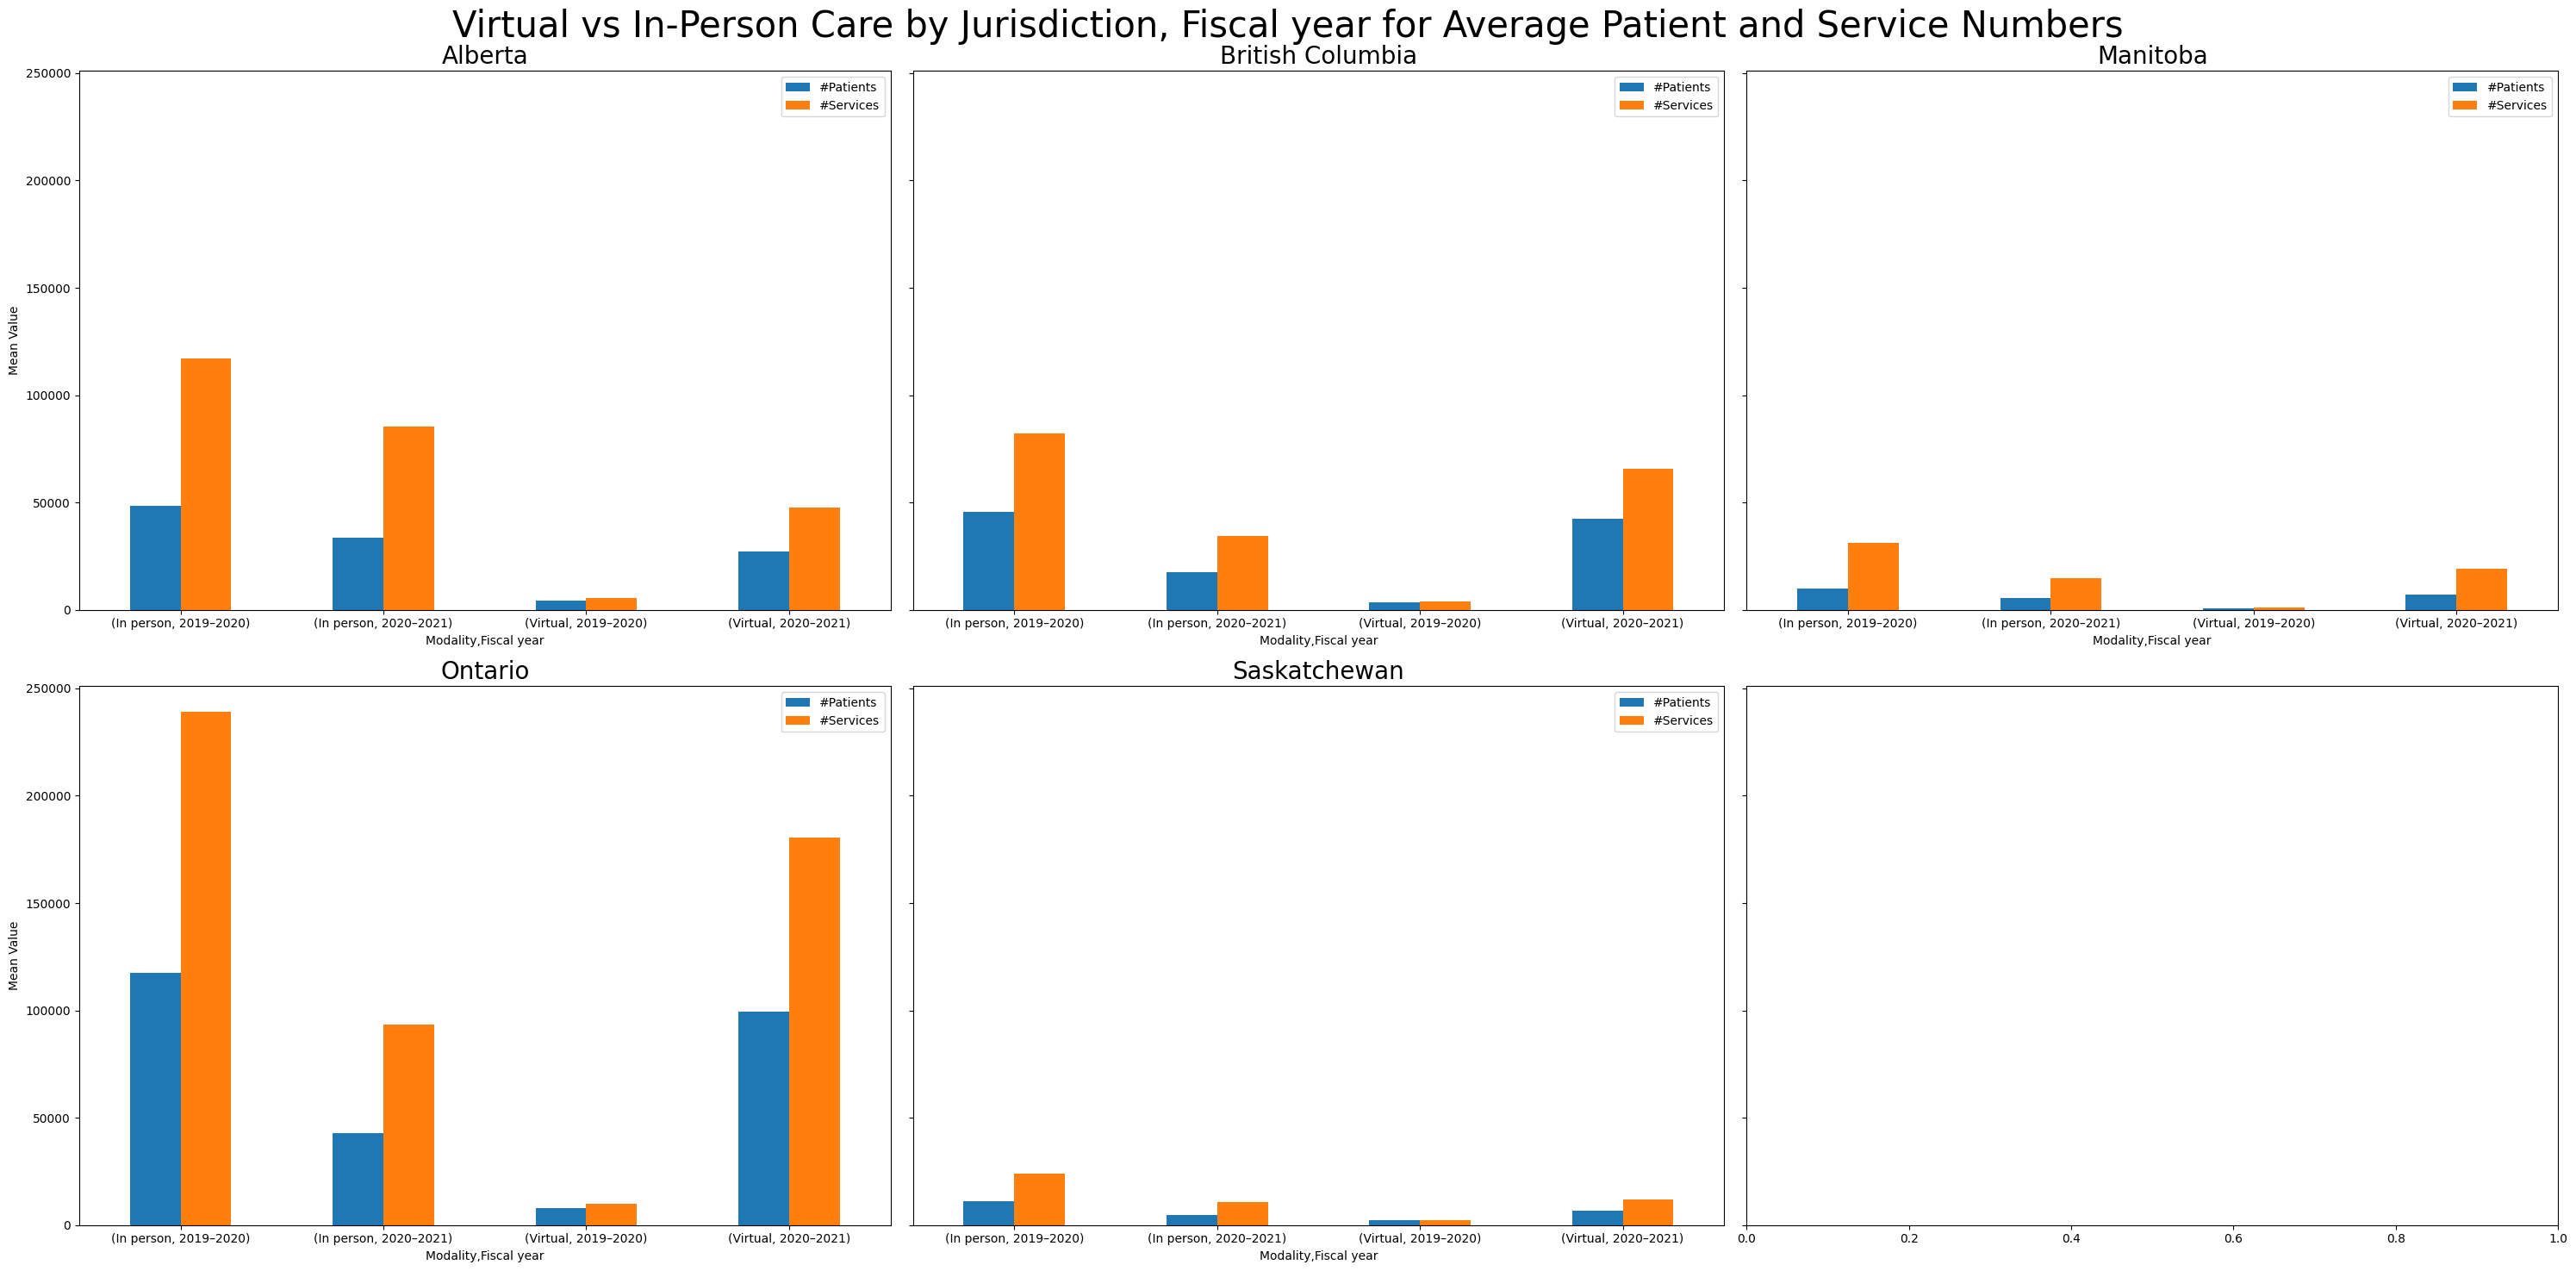

In [12]:
groups1 = df1.groupby(['Jurisdiction', 'Modality', 'Fiscal year'])['#Patients', '#Services'].mean()
dist_geo = df1['Jurisdiction'].unique()
fig, axs = plt.subplots(2, 3, figsize=(30, 15), sharey=True)

fig.suptitle('Virtual vs In-Person Care by Jurisdiction, Fiscal year for Average Patient and Service Numbers', fontsize=30)

for i, jurisdiction in enumerate(dist_geo):
    row = i // 3
    col = i % 3

    ax = axs[row, col]

    jur_data = groups1.xs(jurisdiction, level='Jurisdiction')
    jur_data.plot(kind='bar', ax=ax, title=f'{jurisdiction}')
    ax.set_ylabel('Mean Value')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
    ax.set_title(f'{jurisdiction}', fontsize=20)

plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

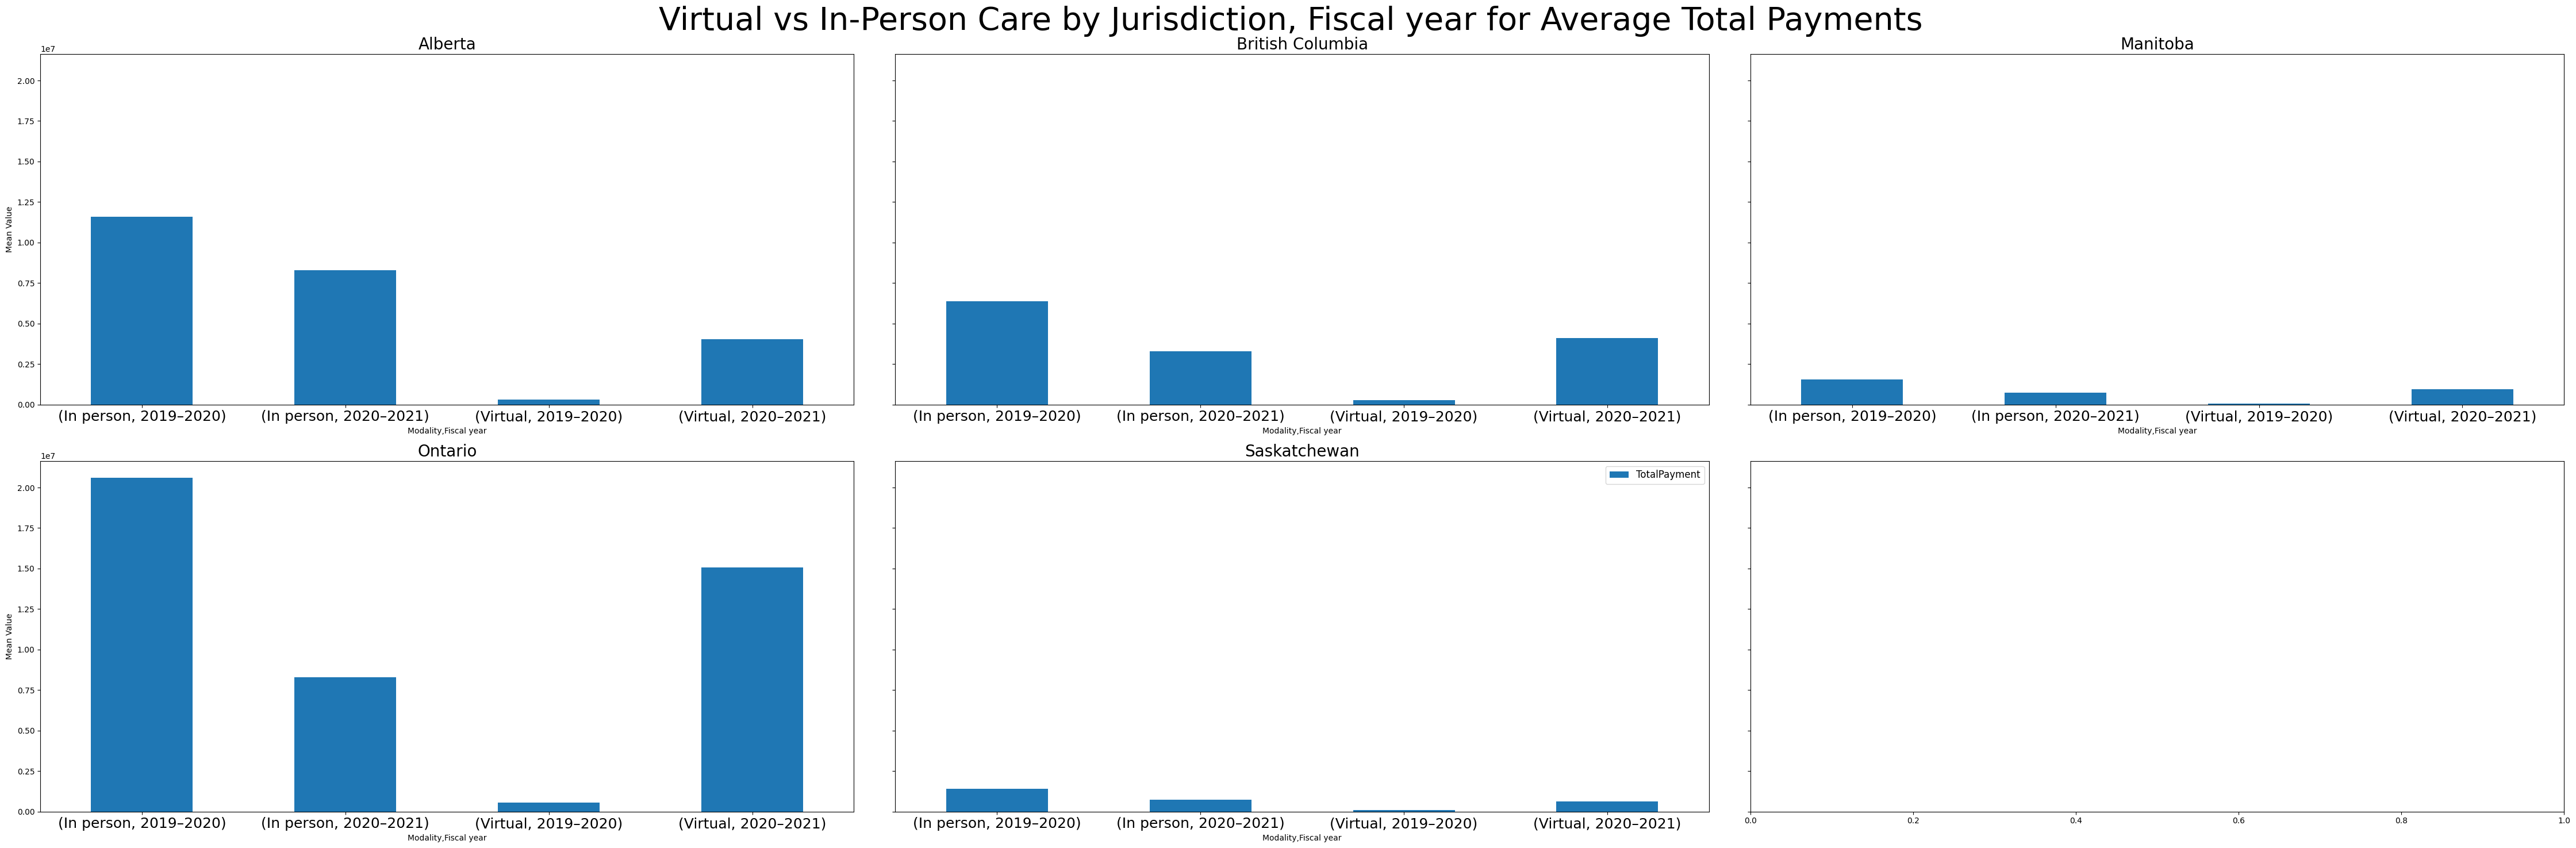

In [13]:
groups2 = df1.groupby(['Jurisdiction', 'Modality', 'Fiscal year'])['TotalPayment'].mean()

fig, axs = plt.subplots(2, 3, figsize=(45, 15), sharey=True)

fig.suptitle('Virtual vs In-Person Care by Jurisdiction, Fiscal year for Average Total Payments', fontsize=40)

for i, jurisdiction in enumerate(dist_geo):
    row = i // 3
    col = i % 3

    ax = axs[row, col]

    jur_data = groups2.xs(jurisdiction, level='Jurisdiction')
    jur_data.plot(kind='bar', ax=ax)
    ax.set_ylabel('Mean Value')
    ax.set_xticklabels(ax.get_xticklabels(),rotation=0, fontsize=18)
    ax.set_title(f'{jurisdiction}', fontsize=20)

ax.legend(fontsize=12)
plt.subplots_adjust(wspace=0.5)
plt.tight_layout()
plt.show()

###**Preferred Visit Modality  - 2021**

#### Province-wise

In [14]:
path2 = "/drive/My Drive/Project/Preferred_Visit.xlsx"
df2 = pd.read_excel(path2, skiprows=12, header=0, nrows=18)
df2= df2.iloc[[4]+[7]+[10]+[13]+[16], [2]+ list(range(10,18))]#+ list(range(18,25))]

df2 = df2.reset_index(drop=True)
df2.columns = ['preferred_visit', 'BC', 'AB', 'SK', 'MB', 'ON', 'QC', 'ATL', 'TERR'] # 'NL', 'NS', 'PE', 'NB', 'NT', 'YT', 'NU']
df2

,preferred_visit,BC,AB,SK,MB,ON,QC,ATL,TERR
0,(Net) Virtual\n_____________,672.084407,470.360004,160.345685,155.007473,1823.329916,839.906515,291.280398,8.999912
1,Phone call,310.120081,215.974491,91.219377,82.035331,858.169075,358.628653,171.231089,5.995268
2,Video,256.105054,178.189612,45.679071,42.385008,711.054094,335.613916,69.051069,1.8019
3,"Another type of virtual visit (e.g., text, s...",105.859272,76.195901,23.447237,30.587134,254.106747,145.663946,50.99824,1.202744
4,In-Person,938.872727,883.022935,212.416503,256.980015,2817.910575,1965.799897,532.923883,22.759557


In [15]:
df2.dtypes

preferred_visit    object
BC                 object
AB                 object
SK                 object
MB                 object
ON                 object
QC                 object
ATL                object
TERR               object
dtype: object

In [16]:
df2 = df2.applymap(lambda x: 0 if x=="-" else x)
df2

,preferred_visit,BC,AB,SK,MB,ON,QC,ATL,TERR
0,(Net) Virtual\n_____________,672.084407,470.360004,160.345685,155.007473,1823.329916,839.906515,291.280398,8.999912
1,Phone call,310.120081,215.974491,91.219377,82.035331,858.169075,358.628653,171.231089,5.995268
2,Video,256.105054,178.189612,45.679071,42.385008,711.054094,335.613916,69.051069,1.801900
3,"Another type of virtual visit (e.g., text, s...",105.859272,76.195901,23.447237,30.587134,254.106747,145.663946,50.998240,1.202744
4,In-Person,938.872727,883.022935,212.416503,256.980015,2817.910575,1965.799897,532.923883,22.759557


In [17]:
dtype_dict2 = {col: 'int' for col in df2.columns if col != 'preferred_visit'}
df2 = df2.astype(dtype_dict2, errors= 'ignore')
df2

,preferred_visit,BC,AB,SK,MB,ON,QC,ATL,TERR
0,(Net) Virtual\n_____________,672,470,160,155,1823,839,291,8
1,Phone call,310,215,91,82,858,358,171,5
2,Video,256,178,45,42,711,335,69,1
3,"Another type of virtual visit (e.g., text, s...",105,76,23,30,254,145,50,1
4,In-Person,938,883,212,256,2817,1965,532,22


In [18]:
df2_unpivot = pd.melt(df2, id_vars=['preferred_visit'], var_name='Province', value_name='Freq').reset_index(drop=True)
df2_unpivot.head()

,preferred_visit,Province,Freq
0,(Net) Virtual\n_____________,BC,672
1,Phone call,BC,310
2,Video,BC,256
3,"Another type of virtual visit (e.g., text, s...",BC,105
4,In-Person,BC,938


In [19]:
#df2_unpivot['preferred_visit2']= df2_unpivot['preferred_visit'].apply(lambda x: x if x=="In-Person" else "Virtual")
df2['preferred_visit2']= df2['preferred_visit'].apply(lambda x: x if x=="In-Person" else "Virtual")
df2_grp= df2.groupby('preferred_visit2').sum()
df2_grp

,BC,AB,SK,MB,ON,QC,ATL,TERR
preferred_visit2,,,,,,,,
In-Person,938,883,212,256,2817,1965,532,22
Virtual,1343,939,319,309,3646,1677,581,15


<Axes: >

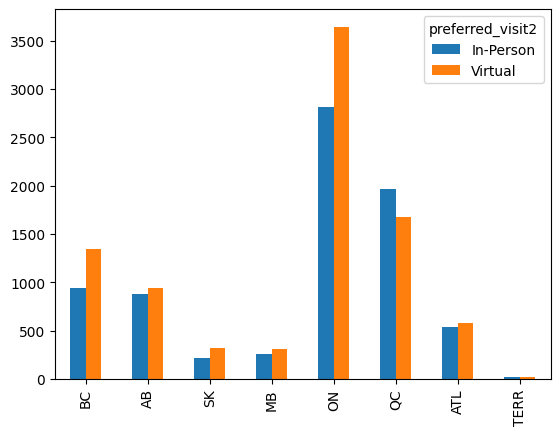

In [20]:
df2_grp.T.plot(kind='bar', stacked=False)

#### Age-wise

In [21]:
df3 = pd.read_excel(path2, skiprows=12, header=0, nrows=18)
df3= df3.iloc[[4]+[7]+[10]+[13]+[16], [2]+ list(range(25,32))]
df3 = df3.reset_index(drop=True)
df3.columns = ['preferred_visit', '16-17', '18-24', '16-24', '25-34', '35-54', '55-64', '65+']
df3

,preferred_visit,16-17,18-24,16-24,25-34,35-54,55-64,65+
0,(Net) Virtual\n_____________,41.228309,533.528391,574.7567,847.315179,1584.805055,664.620047,749.817329
1,Phone call,9.744957,201.585671,211.330628,343.325582,754.335989,338.04242,446.338746
2,Video,17.581295,231.654299,249.235594,387.882033,636.246604,225.60948,140.906013
3,"Another type of virtual visit (e.g., text, s...",13.902057,100.288421,114.190478,116.107564,194.222462,100.968147,162.57257
4,In-Person,127.736199,940.113226,1067.849425,1081.084279,2402.238158,1375.757745,1703.756485


In [22]:
dtype_dict3 = {col: 'int' for col in df3.columns if col != 'preferred_visit'}
df3 = df3.astype(dtype_dict3, errors= 'ignore')
df3

,preferred_visit,16-17,18-24,16-24,25-34,35-54,55-64,65+
0,(Net) Virtual\n_____________,41,533,574,847,1584,664,749
1,Phone call,9,201,211,343,754,338,446
2,Video,17,231,249,387,636,225,140
3,"Another type of virtual visit (e.g., text, s...",13,100,114,116,194,100,162
4,In-Person,127,940,1067,1081,2402,1375,1703


In [23]:
df3['18-64']= df3['18-24']+df3['25-34']+df3['35-54']+df3['55-64']
df3.drop(df3.columns[[2,3,4,5,6]], axis=1, inplace=True)
df3

,preferred_visit,16-17,65+,18-64
0,(Net) Virtual\n_____________,41,749,3628
1,Phone call,9,446,1636
2,Video,17,140,1479
3,"Another type of virtual visit (e.g., text, s...",13,162,510
4,In-Person,127,1703,5798


In [24]:
df3['preferred_visit2']= df3['preferred_visit'].apply(lambda x: x if x=="In-Person" else "Virtual")
df3_grp= df3.groupby('preferred_visit2').sum()
df3_grp

,16-17,65+,18-64
preferred_visit2,,,
In-Person,127,1703,5798
Virtual,80,1497,7253


<Axes: >

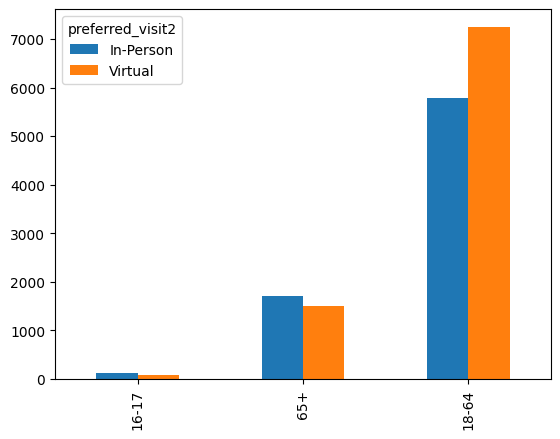

In [25]:
df3_grp.T.plot(kind='bar', stacked=False)

#### Sex-wise

In [26]:
df4 = pd.read_excel(path2, skiprows=12, header=0, nrows=18)
df4= df4.iloc[[4]+[7]+[10]+[13]+[16], [2]+ list(range(32,35))]
df4 = df4.reset_index(drop=True)
df4.columns = ['preferred_visit', 'Male', 'Female', 'Other']
df4

,preferred_visit,Male,Female,Other
0,(Net) Virtual\n_____________,1982.751859,2391.562451,43
1,Phone call,865.856939,1206.516426,19
2,Video,815.492335,808.387389,15
3,"Another type of virtual visit (e.g., text, s...",301.402585,376.658636,9
4,In-Person,3813.238565,3733.447527,68


In [27]:
dtype_dict4 = {col: 'int' for col in df4.columns if col != 'preferred_visit'}
df4 = df4.astype(dtype_dict4, errors= 'ignore')
df4

,preferred_visit,Male,Female,Other
0,(Net) Virtual\n_____________,1982,2391,43
1,Phone call,865,1206,19
2,Video,815,808,15
3,"Another type of virtual visit (e.g., text, s...",301,376,9
4,In-Person,3813,3733,68


In [28]:
df4['preferred_visit2']= df4['preferred_visit'].apply(lambda x: x if x=="In-Person" else "Virtual")
df4_grp= df4.groupby('preferred_visit2').sum()
df4_grp

,Male,Female,Other
preferred_visit2,,,
In-Person,3813,3733,68
Virtual,3963,4781,86


<Axes: >

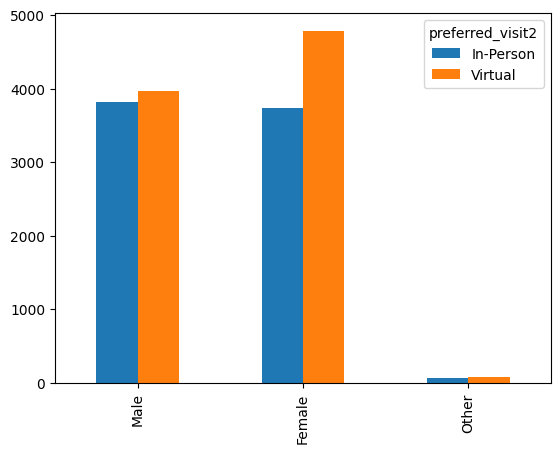

In [29]:
df4_grp.T.plot(kind='bar', stacked=False)


### **Overall Satisfaction of e-Mental Health Service 2021**

#### Province-Wise

In [30]:
path3 = "/drive/My Drive/Project/overall_satisfaction.xlsx"
df5 = pd.read_excel(path3, skiprows=9, header=0, nrows=18)
df5= df5.iloc[[7]+[10]+[13]+[16], [2]+ list(range(10,18))].reset_index(drop=True)
df5.columns = ['Overall_Satisfaction', 'BC', 'AB', 'SK', 'MB', 'ON', 'QC', 'ATL', 'TERR']
df5

,Overall_Satisfaction,BC,AB,SK,MB,ON,QC,ATL,TERR
0,4 Strongly agree,66.166123,66.221043,29.880176,18.279664,212.114175,60.059795,41.108874,2.974445
1,3 Moderately agree,75.583951,48.591629,17.471132,16.862705,185.544641,73.877993,28.546892,1.844513
2,2 Moderately disagree,18.190564,17.225692,4.35844,8.559295,47.383069,19.095267,9.871293,1.1004
3,1 Strongly disagree,14.340784,7.533951,-,2.883703,20.726927,7.217698,1.874164,1.164632


In [31]:
df5 = df5.applymap(lambda x: 0 if x=="-" else x)
dtype_dict3 = {col: 'int' for col in df5.columns if col != 'Overall_Satisfaction'}
df5 = df5.astype(dtype_dict3, errors= 'ignore')
df5

,Overall_Satisfaction,BC,AB,SK,MB,ON,QC,ATL,TERR
0,4 Strongly agree,66,66,29,18,212,60,41,2
1,3 Moderately agree,75,48,17,16,185,73,28,1
2,2 Moderately disagree,18,17,4,8,47,19,9,1
3,1 Strongly disagree,14,7,0,2,20,7,1,1


<Axes: >

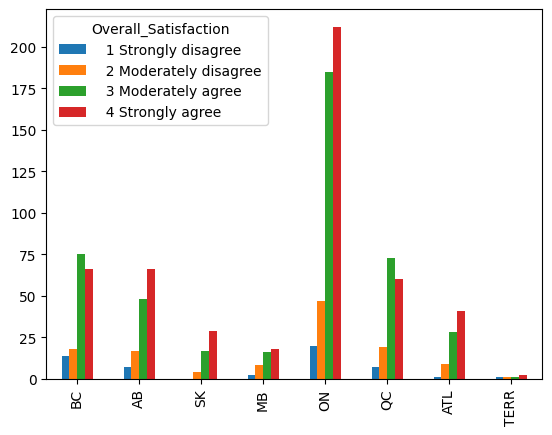

In [32]:
df5_grp= df5.groupby('Overall_Satisfaction').sum()

df5_grp.T.plot(kind='bar', stacked=False)

#### Overall Satisfaction

([0, 1, 2, 3],
 [Text(0, 0, '  4 Strongly agree'),
  Text(1, 0, '  3 Moderately agree'),
  Text(2, 0, '  2 Moderately disagree'),
  Text(3, 0, '  1 Strongly disagree')])

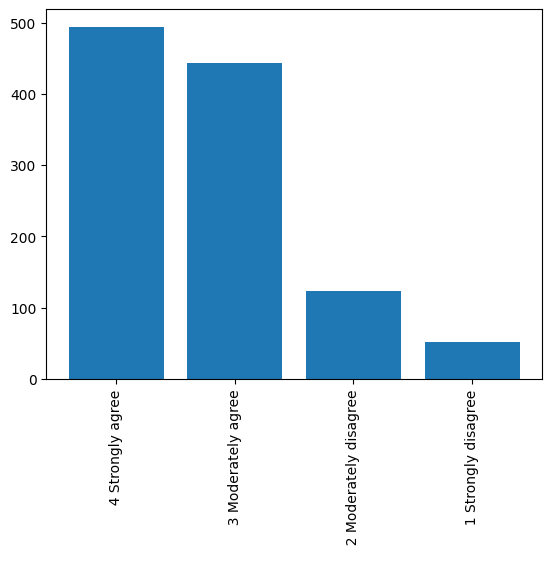

In [118]:
df5['total']= pd.DataFrame(df5.iloc[:, list(range(1,9))].sum(axis=1))
# df5['total'].plot(kind='bar')
# plt.xticks(ticks=df5['Overall_Satisfaction'])
plt.bar(df5['Overall_Satisfaction'], df5['total'])
plt.xticks(rotation='vertical')

#### Age-wise

In [34]:
df6 = pd.read_excel(path3, skiprows=9, header=0, nrows=18)
df6= df6.iloc[[7]+[10]+[13]+[16], [2]+[25]+[26]+list(range(28,32))].reset_index(drop=True)
df6.columns = ['Overall_Satisfaction', '16-17', '18-24', '25-34', '35-54', '55-64', '65+']
df6

,Overall_Satisfaction,16-17,18-24,25-34,35-54,55-64,65+
0,4 Strongly agree,7.723629,76.076196,130.420252,184.759411,50.719046,47.105761
1,3 Moderately agree,10.290412,95.299629,108.617606,163.888152,43.681625,26.546032
2,2 Moderately disagree,1.846423,28.953254,27.81754,43.704289,15.56897,7.893544
3,1 Strongly disagree,0.846423,12.521279,7.934828,21.619683,10.893365,1.926281


In [35]:
df6 = df6.applymap(lambda x: 0 if x=="-" else x)
dtype_dict3 = {col: 'int' for col in df6.columns if col != 'Overall_Satisfaction'}
df6 = df6.astype(dtype_dict3, errors= 'ignore')
df6

,Overall_Satisfaction,16-17,18-24,25-34,35-54,55-64,65+
0,4 Strongly agree,7,76,130,184,50,47
1,3 Moderately agree,10,95,108,163,43,26
2,2 Moderately disagree,1,28,27,43,15,7
3,1 Strongly disagree,0,12,7,21,10,1


In [36]:
df6['18-64']=df6['18-24']+df6['25-34']+df6['35-54']+df6['55-64']
df6.drop(['18-24','25-34','35-54','55-64'], axis=1, inplace=True)
df6

,Overall_Satisfaction,16-17,65+,18-64
0,4 Strongly agree,7,47,440
1,3 Moderately agree,10,26,409
2,2 Moderately disagree,1,7,113
3,1 Strongly disagree,0,1,50


<Axes: >

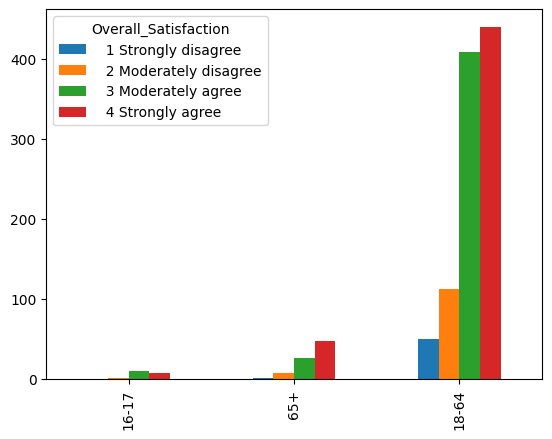

In [37]:
df6_grp= df6.groupby('Overall_Satisfaction').sum()

df6_grp.T.plot(kind='bar', stacked=False)

#### Gender-wise

In [38]:
df7 = pd.read_excel(path3, skiprows=9, header=0, nrows=18)
df7= df7.iloc[[7]+[10]+[13]+[16], [2]+list(range(32,35))].reset_index(drop=True)
df7.columns = ['Overall_Satisfaction', 'Male', 'Female', 'Other']
df7

,Overall_Satisfaction,Male,Female,Other
0,4 Strongly agree,261.001235,226.80306,9
1,3 Moderately agree,210.428871,227.894585,9
2,2 Moderately disagree,55.263138,65.520882,4
3,1 Strongly disagree,23.214433,30.527426,2


In [39]:
df7 = df7.applymap(lambda x: 0 if x=="-" else x)
dtype_dict3 = {col: 'int' for col in df7.columns if col != 'Overall_Satisfaction'}
df7 = df7.astype(dtype_dict3, errors= 'ignore')
df7

,Overall_Satisfaction,Male,Female,Other
0,4 Strongly agree,261,226,9
1,3 Moderately agree,210,227,9
2,2 Moderately disagree,55,65,4
3,1 Strongly disagree,23,30,2


<Axes: >

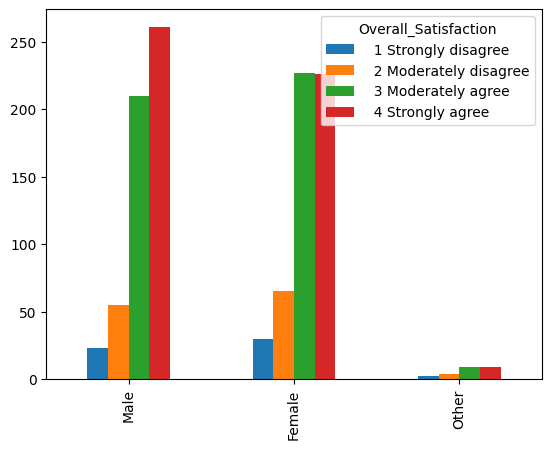

In [40]:
df7_grp= df7.groupby('Overall_Satisfaction').sum()

df7_grp.T.plot(kind='bar', stacked=False)

### **Access To Virtual Care 2019-2021**

In [41]:
path = '/drive/My Drive/Project/access2021.xlsx'
df_access2021 = pd.read_excel(path, skiprows=12, usecols=[2, 3])
df_access2021 = df_access2021.rename(columns={df_access2021.columns[0]: "Access",
                                              df_access2021.columns[1]: "2021"})

drop_rows = list(range(0, 5)) + list(range(6, 8)) + list(range(9, 11)) + list(range(12, 17))

df_access2021 = df_access2021.drop(drop_rows)
df_access2021 = df_access2021.reset_index(drop=True)
df_access2021.at[0,'Access']='Yes'
df_access2021.at[1,'Access']='No'
df_access2021.at[2,'Access']="Don't know"
df_access2021.head(20)

,Access,2021
0,Yes,0.513020
1,No,0.369619
2,Don't know,0.117361


In [42]:
path = '/drive/My Drive/Project/access2020.xlsx'
df_access2020 = pd.read_excel(path, skiprows=9,usecols=[1])
df_access2020 = df_access2020.rename(columns={
                                              df_access2020.columns[0]: "2020"})

drop_rows = list(range(0, 2))
df_access2020 = df_access2020.drop(drop_rows)
df_access2020 = df_access2020.reset_index(drop=True)
df_access2020.head()

,2020
0,0.515105
1,0.342811
2,0.142084


In [43]:
path = '/drive/My Drive/Project/access2019.xlsx'
df_access2019 = pd.read_excel(path, skiprows=7, usecols=[1])
df_access2019 = df_access2019.rename(columns={
                                              df_access2019.columns[0]: "2019"})
drop_rows = list(range(0, 1)) + list(range(2, 4)) + list(range(5, 7)) + list(range(8, 13))
df_access2019 = df_access2019.drop(drop_rows)
df_access2019 = df_access2019.reset_index(drop=True)
df_access2019.head(20)

,2019
0,0.216482
1,0.549754
2,0.233764


In [44]:
df_access = pd.concat([df_access2021, df_access2020, df_access2019], axis=1)
df_access['2021'] = df_access['2021'].apply(lambda x: x * 100)
df_access['2020'] = df_access['2020'].apply(lambda x: x * 100)
df_access['2019'] = df_access['2019'].apply(lambda x: x * 100)
df_access

,Access,2021,2020,2019
0,Yes,51.301992,51.510488,21.648173
1,No,36.961861,34.281069,54.975420
2,Don't know,11.736147,14.208443,23.376406


In [45]:
df_access = df_access.applymap(lambda x: 0 if x=="-" else x)
dtype_dict3 = {col: 'int' for col in df_access.columns if col != 'Access'}
df_access = df_access.astype(dtype_dict3, errors= 'ignore')
df_access

,Access,2021,2020,2019
0,Yes,51,51,21
1,No,36,34,54
2,Don't know,11,14,23


<Axes: >

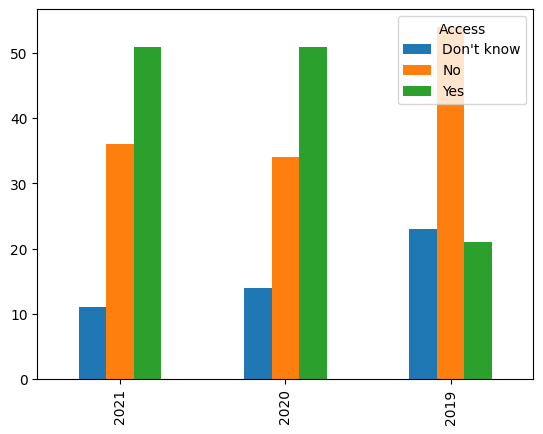

In [46]:
df_acess_grp= df_access.groupby('Access').sum()

df_acess_grp.T.plot(kind='bar', stacked=False)

In [47]:
path2 = '/drive/My Drive/Project/access2021.xlsx'
df_access2021 = pd.read_excel(path2, skiprows=16, usecols=[2, 25, 26, 28, 29, 30, 31])
df_access2021 = df_access2021.rename(columns={df_access2021.columns[0]: "Access",
                                              df_access2021.columns[1]: "16-17",
                                    df_access2021.columns[2]: "18-24",
                                    df_access2021.columns[3]: "25-34",
                                    df_access2021.columns[4]: "35-54",
                                    df_access2021.columns[5]: "55-64",
                                    df_access2021.columns[6]: "65+"})

drop_rows = list(range(1, 3)) + list(range(4, 13))
#drop_rows = list(range(1, 4)) + list(range(5, 7))+ list(range(8, 13))

df_access2021 = df_access2021.drop(drop_rows)
df_access2021 = df_access2021.reset_index(drop=True)
df_access2021.at[0,'Access']='Yes'
df_access2021.at[1,'Access']='No'
df_access2021['Year'] = '2021'
# dtype_dict = {col: 'int' for col in df_access2021.columns if col != 'Access'}
# df_access2021 = df_access2021.astype(dtype_dict, errors= 'ignore')
cols = ['16-17', '18-24', '25-34', '55-64', '65+']
df_access2021[cols] = df_access2021[cols].apply(lambda x: x * 100)
df_access2021

,Access,16-17,18-24,25-34,35-54,55-64,65+,Year
0,Yes,10666.645,92024.1494,125833.8948,2277.374916,87635.7491,74393.696,2021
1,No,4477.9575,40334.8637,49662.3123,1277.001635,88008.413,135280.6567,2021


In [48]:
df_access2021['18-64']=df_access2021['18-24']+df_access2021['25-34']+df_access2021['35-54']+df_access2021['55-64']
df_access2021.drop(['18-24','25-34','35-54','55-64'], axis=1, inplace=True)
df_access2021

,Access,16-17,65+,Year,18-64
0,Yes,10666.645,74393.696,2021,307771.168216
1,No,4477.9575,135280.6567,2021,179282.590635


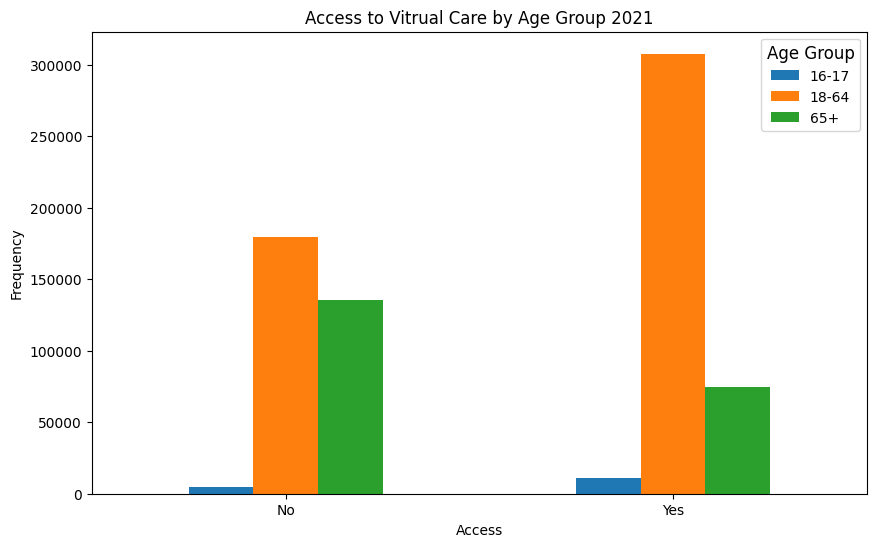

In [49]:
df_plot = df_access2021.copy()

# Melt the DataFrame to convert the columns to rows
df_melted = df_plot.melt(id_vars=['Access', 'Year'], var_name='Age_Group', value_name='Percentage')

df_melted['Year'] = df_melted['Year'].astype(str)


grouped = df_melted.groupby(['Access', 'Age_Group']).mean().reset_index()

pivot = grouped.pivot(index=['Access'], columns='Age_Group', values='Percentage')


pivot.plot(kind='bar', figsize=(10, 6))


plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.title('Access to Vitrual Care by Age Group 2021')


plt.legend(title='Age Group', title_fontsize='12')


plt.show()

#### Access to Virtual Care by Province

In [73]:
path = "/drive/My Drive/Project/access2019.xlsx"
df_access2019 = pd.read_excel(path, skiprows=0, header=0)#, nrows=17)
df_access2019= df_access2019.iloc[[7]+[10], [0]+ list(range(2,8))+ [10]+ [11]].reset_index(drop=True)
df_access2019.columns = ['access', 'BC', 'AB', 'TERR', 'ON', 'QC', 'ATL', 'SK', 'MB']
#df_access2019['Year'] = '2019'
dtype_dict = {col: 'int' for col in df_access2019.columns if col != 'access'}
df_access2019 = df_access2019.astype(dtype_dict, errors= 'ignore')
df_access2019

,access,BC,AB,TERR,ON,QC,ATL,SK,MB
0,Yes,136,112,75,329,229,54,34,40
1,No,334,240,132,895,623,156,43,87


Text(0.5, 1.0, 'Access to Vitrual Care by Province 2019')

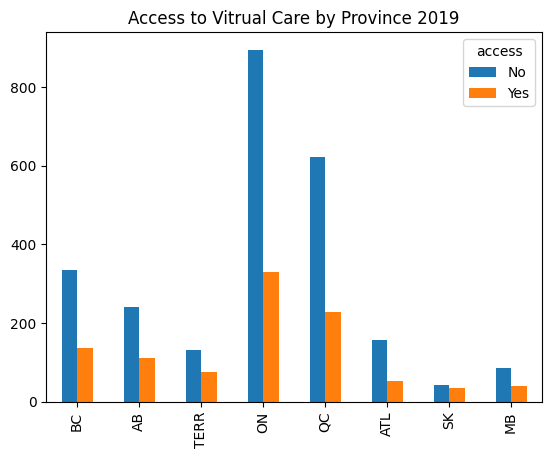

In [119]:
access2019_grp= df_access2019.groupby('access').sum()

access2019_grp.T.plot(kind='bar', stacked=False)
plt.title ("Access to Vitrual Care by Province 2019")

In [100]:
path = "/drive/My Drive/Project/access2020.xlsx"
df_access2020 = pd.read_excel(path, skiprows=6,  usecols = [0,2,3,5,6,7,10,11,15])
df_access2020= df_access2020.iloc[[5]+[6],:].reset_index(drop=True)
df_access2020.columns = ['access', 'BC', 'AB', 'ON', 'QC', 'ATL', 'SK', 'MB', 'TERR']
cols = ['BC', 'AB', 'ON', 'QC', 'ATL', 'SK', 'MB', 'TERR']
df_access2020[cols] = df_access2020[cols].apply(lambda x: x * 100)
df_access2020

,access,BC,AB,ON,QC,ATL,SK,MB,TERR
0,Yes,50.028546,49.220238,52.935771,52.066420,50.138741,49.438273,51.390789,42.5
1,No,35.740509,34.574831,34.391364,32.534676,37.206396,36.416395,29.873223,40.0


Text(0.5, 1.0, 'Access to Vitrual Care by Province 2020')

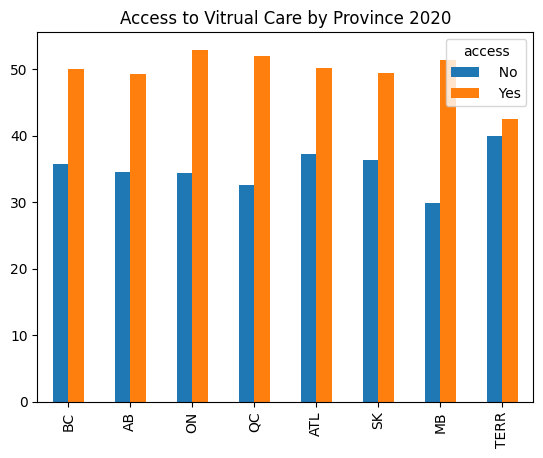

In [120]:
access2020_grp= df_access2020.groupby('access').sum()

access2020_grp.T.plot(kind='bar', stacked=False)
plt.title ("Access to Vitrual Care by Province 2020")

In [111]:
path = "/drive/My Drive/Project/access2021.xlsx"
df_access2021 = pd.read_excel(path, skiprows=0, header=0, usecols=[2,4,5,7,8,9,12,13,17])#, nrows=17)
df_access2021= df_access2021.iloc[[16]+[19], :].reset_index(drop=True)
df_access2021.columns = ['access', 'BC', 'AB', 'ON', 'QC', 'ATL', 'SK', 'MB', 'TERR']
dtype_dict = {col: 'int' for col in df_access2019.columns if col != 'access'}
df_access2021 = df_access2021.astype(dtype_dict, errors= 'ignore')
df_access2021

,access,BC,AB,ON,QC,ATL,SK,MB,TERR
0,Yes,854,699,2350,1391,442,193,235,16
1,No,549,504,1692,1128,293,137,136,12


Text(0.5, 1.0, 'Access to Vitrual Care by Province 2021')

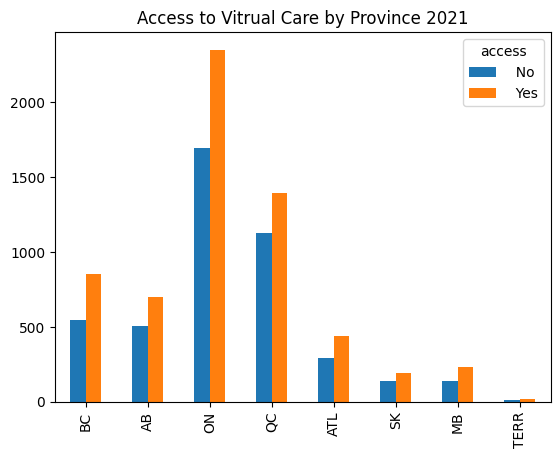

In [121]:
access2021_grp= df_access2021.groupby('access').sum()

access2021_grp.T.plot(kind='bar', stacked=False)
plt.title ("Access to Vitrual Care by Province 2021")

#### Access to Virtual Care by Age Group

In [50]:
path3 = '/drive/My Drive/Project/access2020.xlsx'
df_access2020 = pd.read_excel(path3, skiprows = 6, usecols = [0, 23, 24, 26, 27, 28, 29])
df_access2020 = df_access2020.rename(columns={df_access2020.columns[0]: "Access",
                                              df_access2020.columns[1]: "16-17",
                                    df_access2020.columns[2]: "18-24",
                                    df_access2020.columns[3]: "25-34",
                                    df_access2020.columns[4]: "35-54",
                                    df_access2020.columns[5]: "55-64",
                                    df_access2020.columns[6]: "65+"})

drop_rows = list(range(0, 5)) + list(range(7, 8))
#drop_rows = list(range(1, 3)) + list(range(4, 6))#+ list(range(7, 13))
df_access2020 = df_access2020.drop(drop_rows)
df_access2020 = df_access2020.reset_index(drop=True)
df_access2020['Year'] = '2020'
cols = ['16-17', '18-24', '25-34', '55-64', '65+']
df_access2020[cols] = df_access2020[cols].apply(lambda x: x * 100)
df_access2020.head(20)

,Access,16-17,18-24,25-34,35-54,55-64,65+,Year
0,Yes,66.010194,65.195363,65.804309,0.570749,44.280349,28.176438,2020
1,No,18.321784,22.973740,23.832475,0.302263,36.412159,55.268482,2020


In [51]:
df_access2020['18-64']=df_access2020['18-24']+df_access2020['25-34']+df_access2020['35-54']+df_access2020['55-64']
df_access2020.drop(['18-24','25-34','35-54','55-64'], axis=1, inplace=True)
df_access2020

,Access,16-17,65+,Year,18-64
0,Yes,66.010194,28.176438,2020,175.850769
1,No,18.321784,55.268482,2020,83.520636


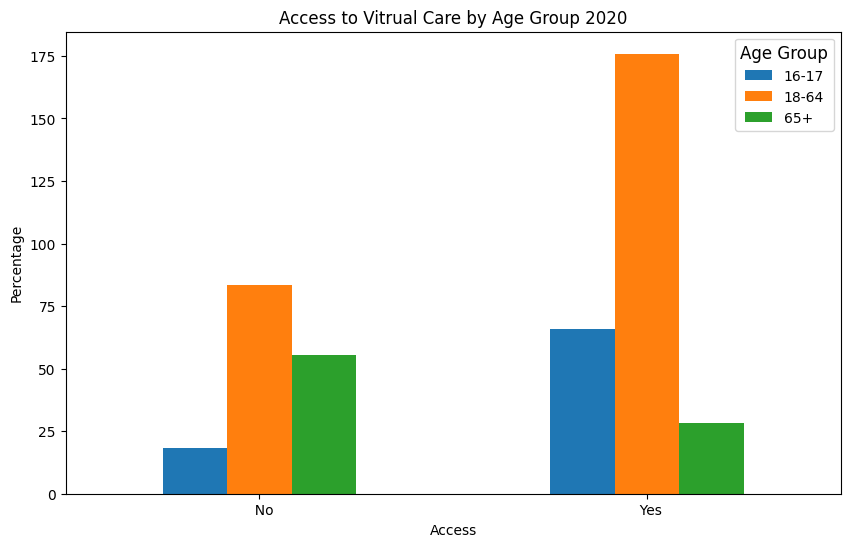

In [52]:
df_plot2 = df_access2020.copy()

df_melted2 = df_plot2.melt(id_vars=['Access', 'Year'], var_name='Age_Group', value_name='Percentage')

df_melted2['Year'] = df_melted2['Year'].astype(str)


grouped = df_melted2.groupby(['Access', 'Age_Group']).mean().reset_index()

pivot = grouped.pivot(index=['Access'], columns='Age_Group', values='Percentage')


pivot.plot(kind='bar', figsize=(10, 6))


plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Access to Vitrual Care by Age Group 2020')


plt.legend(title='Age Group', title_fontsize='12')


plt.show()


#### **Access to Virtual Care by Sex**

In [53]:
path = '/drive/My Drive/Project/access2021.xlsx'
df_access2021 = pd.read_excel(path, skiprows=17, usecols=[32, 33, 34])
df_access2021 = df_access2021.rename(columns={df_access2021.columns[0]: "Male",
                                              df_access2021.columns[1]: "Female",
                                    df_access2021.columns[2]: "Other"})


drop_rows = list(range(1, 3)) + list(range(4, 12))

df_access2021 = df_access2021.drop(drop_rows)
df_access2021 = df_access2021.reset_index(drop=True)
df_access2021.at[0,'Access']='Yes'
df_access2021.at[1,'Access']='No'
numeric_columns = ['Male', 'Female', 'Other']
df_access2021[numeric_columns] = df_access2021[numeric_columns].apply(pd.to_numeric)
cols = ['Male', 'Female', 'Other']
df_access2021[cols] = df_access2021[cols].apply(lambda x: x * 100)
df_access2021.head()

,Male,Female,Other,Access
0,49.781490,52.662541,58.558559,Yes
1,39.825228,34.422430,27.027027,No


In [54]:
path = '/drive/My Drive/Project/access2020.xlsx'
df_access2020 = pd.read_excel(path, skiprows=11, usecols = [30, 31, 32])
df_access2020 = df_access2020.rename(columns={df_access2020.columns[0]: "Male",
                                              df_access2020.columns[1]: "Female",
                                    df_access2020.columns[2]: "Other"})



df_access2020 = df_access2020.drop(2)
df_access2020.at[0,'Access']='Yes'
df_access2020.at[1,'Access']='No'
cols = ['Male', 'Female', 'Other']
df_access2020[cols] = df_access2020[cols].apply(lambda x: x * 100)
df_access2020.head()

,Male,Female,Other,Access
0,50.319214,52.527627,66.666667,Yes
1,36.358447,32.540182,18.181818,No


In [55]:
path = '/drive/My Drive/Project/access2019.xlsx'
df_access2019 = pd.read_excel(path, skiprows=8, usecols = [22, 23, 24])
df_access2019 = df_access2019.rename(columns={df_access2019.columns[0]: "Male",
                                              df_access2019.columns[1]: "Female",
                                    df_access2019.columns[2]: "Other"})

drop_rows = list(range(1, 3)) + list(range(4, 12))

df_access2019 = df_access2019.drop(drop_rows)
df_access2019 = df_access2019.reset_index(drop=True)
df_access2019.at[0,'Access']='Yes'
df_access2019.at[1,'Access']='No'
cols = ['Male', 'Female', 'Other']
df_access2019[cols] = df_access2019[cols].apply(lambda x: x * 100)
df_access2019.head(20)

,Male,Female,Other,Access
0,22.668336,20.684513,22.727335,Yes
1,53.453689,56.412869,53.370743,No


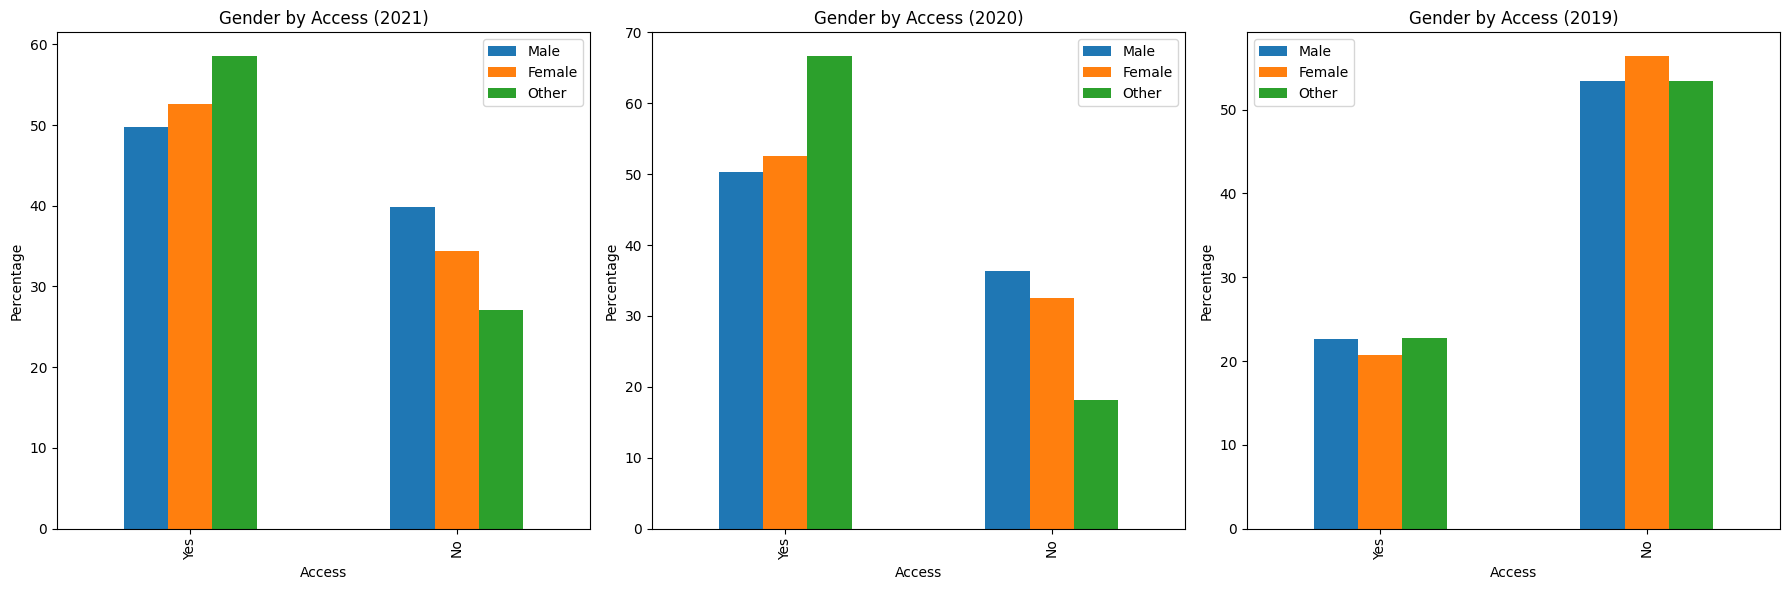

In [56]:
dfs = [df_access2021, df_access2020, df_access2019]
years = [2021, 2020, 2019]


fig, axs = plt.subplots(1, 3, figsize=(18, 6))

for i, df in enumerate(dfs):
    # Plot the bar chart on the i-th subplot
    df.plot(kind='bar', x='Access', y=['Male', 'Female', 'Other'], ax=axs[i])
    axs[i].set_title(f'Gender by Access ({years[i]})')
    axs[i].set_xlabel('Access')
    axs[i].set_ylabel('Percentage')

plt.tight_layout()


plt.show()

###**Assessing Associations with Age and Aceess to Virtual Care for Most Recent Year (2021)**

In [57]:
path = '/drive/My Drive/Project/access2021.xlsx'
df_access2021 = pd.read_excel(path, skiprows=14, usecols=[2, 25, 26, 28, 29, 30, 31])
df_access2021 = df_access2021.rename(columns={df_access2021.columns[0]: "Access",
                                              df_access2021.columns[1]: "16-17",
                                    df_access2021.columns[2]: "18-24",
                                    df_access2021.columns[3]: "25-34",
                                    df_access2021.columns[4]: "35-54",
                                    df_access2021.columns[5]: "55-64",
                                    df_access2021.columns[6]: "65+"})

drop_rows = list(range(0, 2)) + list(range(3, 5)) + list(range(6, 15))

df_access2021 = df_access2021.drop(drop_rows)
df_access2021 = df_access2021.reset_index(drop=True)
df_access2021['18-64']=df_access2021['18-24']+df_access2021['25-34']+df_access2021['35-54']+df_access2021['55-64']
df_access2021.drop(['18-24','25-34','35-54','55-64'], axis=1, inplace=True)
df_access2021.set_index('Access', inplace=True)
df_chi = df_access2021.transpose()
df_chi

Access,Yes,No
16-17,106.66645,44.779575
65+,743.93696,1352.806567
18-64,5332.312849,3057.057525


In [58]:
chi2_stat, p_val, dof, expected = chi2_contingency(df_chi)

print(f"Chi-squared Statistic: {chi2_stat}")
print(f"P-value: {p_val}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

if p_val < 0.05:
    print(f'significant association')
else:
    print(f'insignificant association')



Chi-squared Statistic: 552.968697538166
P-value: 8.401812725282294e-121
Degrees of Freedom: 2
Expected Frequencies:
[[  88.02564656   63.42037844]
 [1218.69956402  878.04396298]
 [4876.19104842 3513.17932558]]
significant association


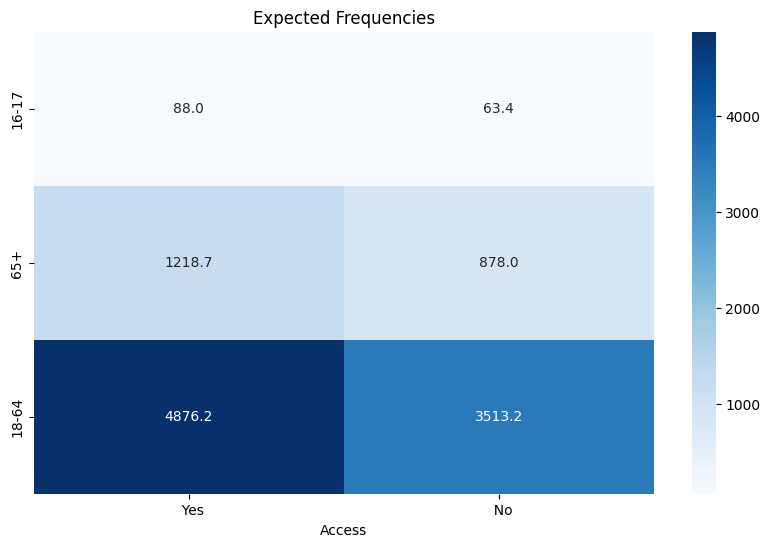

In [59]:
expected_df = pd.DataFrame(expected, columns=df_chi.columns, index=df_chi.index)

plt.figure(figsize=(10, 6))
sns.heatmap(expected_df, annot=True, fmt='.1f', cmap='Blues')
plt.title('Expected Frequencies')
plt.show()